<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy.stats import ttest_ind
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.dummy import DummyRegressor

In [2]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')
data_test = pd.read_csv('/datasets/gold_industry_test.csv')
data_full = pd.read_csv('/datasets/gold_industry_full.csv')

# data_train

In [3]:
data_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [5]:
data_train.duplicated().sum()

0

Явных дупликатов нет

# data_test

In [6]:
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [8]:
data_test.duplicated().sum()

0

Явных дупликатов нет

# data_full

In [9]:
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [10]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [11]:
data_full.duplicated().sum()

0

Явных дубликатов нет

Будем работать с пропусками, в условии сказано, что соседние параметры часто похожи. Воспользуемся этим.


In [12]:
data_train = data_train.ffill() 
data_test = data_test.ffill() 
data_full=data_full.ffill()

**Проверим, что эффективность обогащения рассчитана правильно**

Напишем функцию для подсчета эффективности

In [13]:
def calc_recovery(C, F, T):
    recovery = (C * (F - T))/(F * (C - T))*100
    return recovery

In [14]:
recovery = calc_recovery(data_train['rougher.output.concentrate_au'],
                   data_train['rougher.input.feed_au'],
                   data_train['rougher.output.tail_au'])
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Length: 14579, dtype: float64

In [15]:
mae = mean_absolute_error(data_train['rougher.output.recovery'], recovery)
print('MAE  =', mae)

MAE  = 9.83758577644259e-15


MAE между  расчётами и значением признака имеет очень маленькое значение, следовательно эффективность обогащения рассчитана правильно 

**Проанализируем признаки, недоступные в тестовой выборке.**

In [16]:
data_train.columns.difference(data_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Получается, что на тесте нам не доступны:

primary_cleaner — первичная очистка

rougher — черновой концентрат

secondary_cleaner — вторичная очистка

final — финальные характеристики

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей.

**Вывод**

В первой части проекта:

- открыли файлы и изучили их
- заполнили пропуски в данных с помощью стратегии заполнения forward fill
- проверили, что эффективность обогащения рассчитана правильно. MAE между расчётами и значением признака 9.83758577644259e-15.
- проанализировали признаки, недоступные в тестовой выборке

## Анализ данных

# Изменение концентрации металлов (Au, Ag, Pb) на различных этапах

Информативнее всего рассмотреть этот пункт на графиках

#  новые графики с sns.histplot 

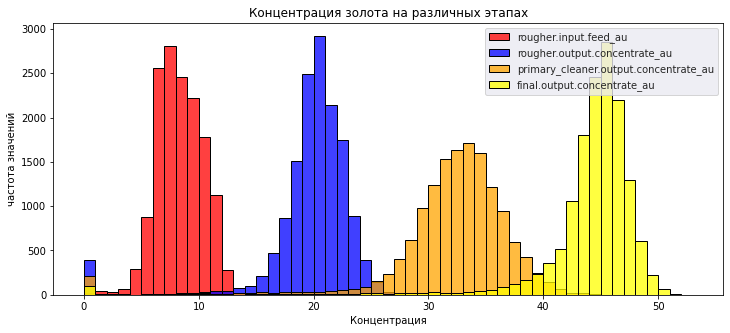

In [17]:
au_concentrate = ['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']  
color=['red','blue','orange','yellow']
f= plt.subplots(figsize=(12,5 ))
for i in range(4):
    sns.histplot(data_train[au_concentrate[i]], kde=False, color=color[i], legend=True, label=au_concentrate[i],binwidth=1)
sns.set_style('darkgrid')
plt.title("Концентрация золота на различных этапах")
plt.xlabel('Концентрация')
plt.ylabel('частота значений')
plt.legend()
plt.show()




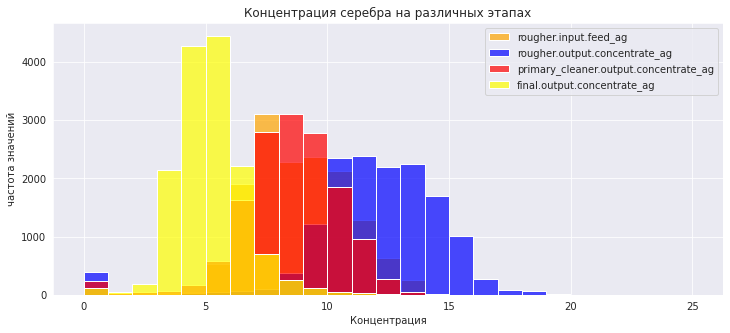

In [18]:
ag_concentrate = ['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']  
color=['orange','blue','red','yellow']
f= plt.subplots(figsize=(12,5 ))
for i in range(4):
    sns.histplot(data_train[ag_concentrate[i]],binwidth=1, kde=False, color=color[i], legend=False, label=ag_concentrate[i],alpha=0.7)
sns.set_style('darkgrid')
plt.title("Концентрация серебра на различных этапах")
plt.xlabel('Концентрация')
plt.ylabel('частота значений')
plt.legend()
plt.show()

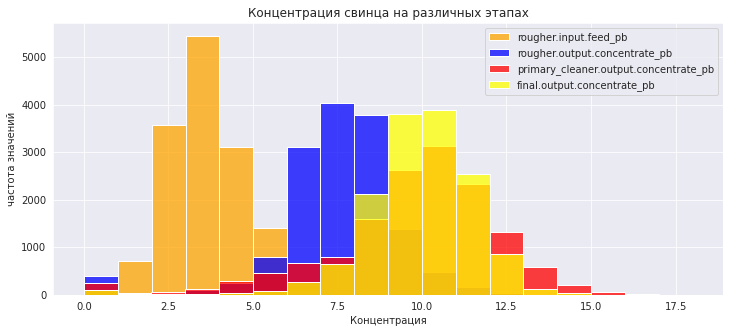

In [19]:
pb_concentrate = ['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']  
color=['orange','blue','red','yellow']
f= plt.subplots(figsize=(12,5 ))
for i in range(4):
    sns.histplot(data_train[pb_concentrate[i]], binwidth=1, kde=False, color=color[i], legend=False, label=pb_concentrate[i])
sns.set_style('darkgrid')
plt.title("Концентрация свинца на различных этапах")
plt.xlabel('Концентрация')
plt.ylabel('частота значений')
plt.legend()
plt.show()

Интересно наличие выбросов в районе нуля, видимо, ошибка в данных либо в производстве

Золото - видно, что концентрация золота растёт

Серебро - концентрация падает от этапа к этапу

Свинец - интересно, что после первичной очистки концентрация возросла, в финальном концентрате свинца больше, чем было изначально

Также на графиках наблюдаем выбросы около 0 это аномалии,которые мы удалим  из всех датафреймов

In [20]:
data_test = data_test[(data_test['rougher.input.feed_ag'] >0) &
            (data_test['rougher.input.feed_pb'] >0) &
            (data_test['rougher.input.feed_sol'] >0) &
            (data_test['rougher.input.feed_au'] >0)]

In [21]:
data_train = data_train[(data_train['rougher.input.feed_ag'] >0) &
            (data_train['rougher.input.feed_pb'] >0) &
            (data_train['rougher.input.feed_sol'] >0) &
            (data_train['rougher.input.feed_au'] >0) &
            (data_train['rougher.output.concentrate_ag'] >0) &
            (data_train['rougher.output.concentrate_pb'] >0) &
            (data_train['rougher.output.concentrate_sol'] >0) &
            (data_train['rougher.output.concentrate_au'] >0) &
            (data_train['primary_cleaner.output.concentrate_ag'] >0) &
            (data_train['primary_cleaner.output.concentrate_pb'] >0) &
            (data_train['primary_cleaner.output.concentrate_sol'] >0) &
            (data_train['primary_cleaner.output.concentrate_au'] >0) &
            (data_train['final.output.concentrate_ag'] >0) &
            (data_train['final.output.concentrate_pb'] >0) &
            (data_train['final.output.concentrate_sol'] >0) &
            (data_train['final.output.concentrate_au'] >0)]

In [22]:
data_full = data_full[(data_full['rougher.input.feed_ag'] >0) &
            (data_full['rougher.input.feed_pb'] >0) &
            (data_full['rougher.input.feed_sol'] >0) &
            (data_full['rougher.input.feed_au'] >0) &
            (data_full['rougher.output.concentrate_ag'] >0) &
            (data_full['rougher.output.concentrate_pb'] >0) &
            (data_full['rougher.output.concentrate_sol'] >0) &
            (data_full['rougher.output.concentrate_au']>0) &
            (data_full['primary_cleaner.output.concentrate_ag'] >0) &
            (data_full['primary_cleaner.output.concentrate_pb'] >0) &
            (data_full['primary_cleaner.output.concentrate_sol'] >0) &
            (data_full['primary_cleaner.output.concentrate_au'] >0) &
            (data_full['final.output.concentrate_ag'] >0) &
            (data_full['final.output.concentrate_pb'] >0) &
            (data_full['final.output.concentrate_sol'] >0) &
            (data_full['final.output.concentrate_au'] >0)]

# Проверим размер гранул сырья в обучающих данных и в тестовой выборке

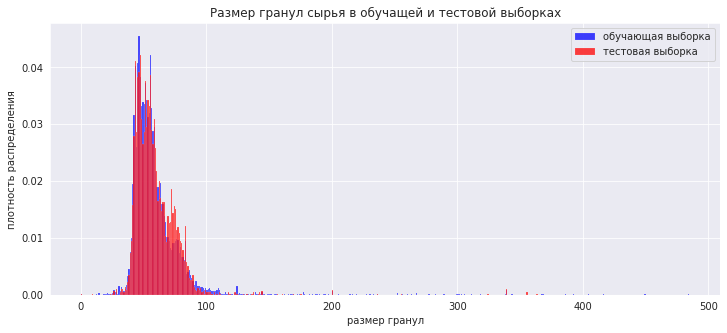

In [23]:
a=[data_train['rougher.input.feed_size'].dropna(),data_test['rougher.input.feed_size'].dropna()]
b=['обучающая выборка','тестовая выборка']
color=['blue','red']
f= plt.subplots(figsize=(12,5))
for i in range(2):
    sns.histplot(a[i], bins=5, kde=False, color=color[i], legend=False, label=b[i],binwidth=1,stat='density')
sns.set_style('darkgrid')
plt.title("Размер гранул сырья в обучащей и тестовой выборках")
plt.xlabel('размер гранул')
plt.ylabel('плотность распределения')
plt.legend()
plt.show()

Видно, что на графике распределение похоже, оценка модели будет правильной

# t-test

**Нулевая гипотеза**: средние значения измерений размеров гранул на обучающей и тестовой выборках не отличаются существенно.

**Альтернативная гипотеза**: средние значения измерений размеров гранул на обучающей и тестовой выборках существенно  отличаются.

In [24]:
t_stat, p_value = ttest_ind(data_train['rougher.input.feed_size'].dropna(), data_test['rougher.input.feed_size'].dropna(), equal_var=False)

In [25]:
alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Распределения размеров гранул существенно отличаются.")
else:
    print("Не отвергаем нулевую гипотезу. Распределения размеров гранул не отличаются существенно.")
print(p_value)

Не отвергаем нулевую гипотезу. Распределения размеров гранул не отличаются существенно.
0.9076993316072393


# Исследуем суммарную концентрацию металлов на разных стадиях

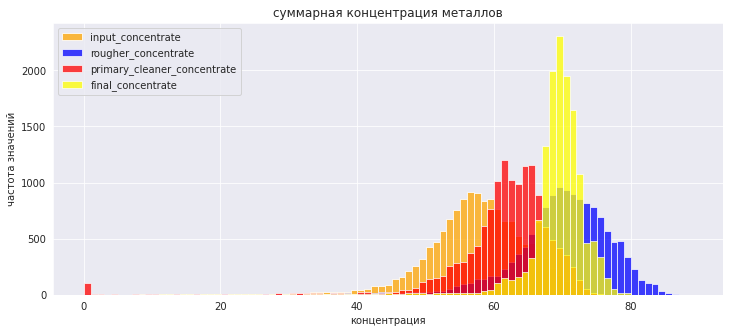

In [26]:
final_concentrate = (data_train['final.output.concentrate_au'] + 
                                      data_train['final.output.concentrate_ag'] + 
                                      data_train['final.output.concentrate_pb'] +
                                      data_train['final.output.concentrate_sol'])
primary_cleaner_concentrate = (data_train['primary_cleaner.output.concentrate_au'] + 
                                                data_train['primary_cleaner.output.concentrate_ag'] + 
                                                data_train['primary_cleaner.output.concentrate_pb'] +
                                                data_train['primary_cleaner.output.concentrate_sol'])
rougher_concentrate = (data_train['rougher.output.concentrate_au'] + 
                                        data_train['rougher.output.concentrate_ag'] + 
                                        data_train['rougher.output.concentrate_pb'] +
                                        data_train['rougher.output.concentrate_sol'])
input_concentrate=(data_train['rougher.input.feed_au'] + 
                                        data_train['rougher.input.feed_ag'] + 
                                        data_train['rougher.input.feed_pb'] +
                                        data_train['rougher.input.feed_sol'])

f= plt.subplots(figsize=(12, 5))  
color=['orange','blue','red','yellow']
a=[input_concentrate,rougher_concentrate,primary_cleaner_concentrate,final_concentrate]
b=['input_concentrate','rougher_concentrate','primary_cleaner_concentrate','final_concentrate']
for i in range(4):
    sns.histplot(a[i], binwidth=1, kde=False, color=color[i], legend=False, label=b[i])
sns.set_style('darkgrid')
plt.title("cуммарная концентрация металлов")
plt.xlabel('концентрация')
plt.ylabel('частота значений')
plt.legend()
plt.show()


Из представленного графика можем заметить интересную тенденцию: с каждым новым этапам ширина/диапозон концентраций уменьшается. При этом в черновом концентрате наблюдалась наибольшая суммарная концентрация металлов. Также можем заметить что финальная коцентрация в большьнстве случаев от 66-73%

**Вывод** на втором этапе работы мы анализировали данные.
- рассмотрели как менялись концентрации золота, серебера и свинца на разных этапах. Заметили логичную закномерность, что с каждым этапом концентрация золота увеличивается, но также интересно, что свинца в финальной концентрации больше, чем было изнчально. На этом этапе мы и заметили аномалии концентраций: возле 0 находили значительные выбросы
- определили что размеры гранул исходного сырья на обучающей и тестовой выборках существенно не отличаются. Это дало нам сигнал, что оценка модели будет правильной.
- исследовали суммарную концентрацию металлов и обнаружили, что максимальное значение будет достигаться в черновом концентрате.

## Модель

 Напишем функцию для вычисления sMAPE

In [27]:
def smape(target,predict):
    smape = np.mean(np.abs(target - predict) / ((np.abs(target) + np.abs(predict)) / 2)) * 100
    return np.abs(smape)

итоговый sMAPE

In [28]:
def final_smape(target, predict):
    target_rougher=target.iloc[:,0]
    target_final=target.iloc[:,1]
    predict_rougher=predict[:,0]
    predict_final=predict[:,1]
    return abs(0.25*smape(target_rougher,predict_rougher) + 0.75*smape(target_final,predict_final))

In [29]:
custom_score = make_scorer(final_smape,greater_is_better=False)

Добавим к data_test стлбцы связанные с rougher.output и final.output

In [30]:
data_test_netu  = data_full[["date", 
                            "rougher.output.recovery", 
                            "final.output.recovery"]]
data_test = data_test.merge(data_test_netu, on="date", how="left")

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Без добавлений в тестовую выборку этих столбцов наш дата фрейм грубо говоря является тогда не нужным. Наиболее важной информации, которая как раз используется в smape, в тестовой ее выборке изначально нет(например  "rougher.output.recovery", 
"final.output.recovery"). . Модель без этих данных мы попросту не сможем проверить
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Получается что  добавление каких либо признаков в test является некоректным, потому что мы тогда обучаем и проверяем модель на тех признаках, которых изначально не было. Поэтому нужно добавить  в test только целевые признаки из train,и дальше удалим лишние признаки из train, то есть те, которых нет в test.

</div>

In [31]:
data_train = data_train.loc[:, list(data_test.columns)]

Т.к. далее будем обучать модель, то в data_train и data_test можем удалить столбец 'date' тк он никак не влияет на обучение нашей модели

In [32]:
data_train = data_train.drop("date", axis=1)
data_test = data_test.drop("date", axis=1)

In [33]:
features_train = data_train.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_train = data_train[["rougher.output.recovery", "final.output.recovery"]]
features_test = data_test.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_test = data_test[["rougher.output.recovery", "final.output.recovery"]]

In [34]:
target_train.head()

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


In [35]:
model_rfr = Pipeline([('scaler', MinMaxScaler()),('regressor', RandomForestRegressor(random_state=12345))])

model_dtr = Pipeline([('scaler', MinMaxScaler()),('regressor', DecisionTreeRegressor(random_state=12345))])

model_lr = Pipeline([('scaler', MinMaxScaler()),('regressor', LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False))])  

model_lasso = Pipeline([('scaler', MinMaxScaler()),('regressor', Lasso())])

model_elasticnet = Pipeline([('scaler', MinMaxScaler()),('regressor', ElasticNet())])


In [36]:
parameters_rfr = {'regressor__n_estimators':[1,5,10],
                  'regressor__max_depth':range(1,10)}

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

определил вне сетки гиперпараметров random_state для RandomForestRegressor и DecisionTreeRegressor
</div>

In [37]:
parameters_dtr = {'regressor__max_depth':range(1,10)}

parametres_lasso = {'regressor__alpha': [0.1,0.5, 1.0]}

param_grid_en = {'regressor__alpha': [0.1,0.5, 1.0],'regressor__l1_ratio': [0.1,0.5, 1.0]}

parameters_lr = {}

In [38]:
grid_search_rfr = GridSearchCV(model_rfr, param_grid=parameters_rfr,  scoring=custom_score,cv=5)

grid_search_dtr = GridSearchCV(model_dtr, param_grid=parameters_dtr,  scoring=custom_score,cv=5)

grid_search_lr = GridSearchCV(model_lr, param_grid=parameters_lr, scoring=custom_score,cv=5)

grid_search_lasso = GridSearchCV(model_lasso, param_grid=parametres_lasso, scoring=custom_score,cv=5)

grid_search_en = GridSearchCV(model_elasticnet, param_grid=param_grid_en, scoring=custom_score,cv=5)

In [39]:
grid_search_rfr.fit(features_train,target_train)

grid_search_dtr.fit(features_train,target_train)

grid_search_lr.fit(features_train,target_train)

grid_search_lasso.fit(features_train,target_train)

grid_search_en.fit(features_train,target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('regressor', ElasticNet())]),
             param_grid={'regressor__alpha': [0.1, 0.5, 1.0],
                         'regressor__l1_ratio': [0.1, 0.5, 1.0]},
             scoring=make_scorer(final_smape, greater_is_better=False))

In [40]:
print("Лучшие гиперпараметры для RandomForestRegressor: ", grid_search_rfr.best_params_)
print("Лучшее значение метрики для RandomForestRegressor: ", -(grid_search_rfr.best_score_))
print('----------------------')
print("Лучшие гиперпараметры для DecisionTreeRegressor: ", grid_search_dtr.best_params_)
print("Лучшее значение метрики для DecisionTreeRegressor: ", -(grid_search_dtr.best_score_))
print('----------------------')
print("Лучшие гиперпараметры для LinearRegression: ", grid_search_lr.best_params_)
print("Лучшее значение метрики для LinearRegression: ", -(grid_search_lr.best_score_))
print('----------------------')
print("Лучшие гиперпараметры для Lasso: ", grid_search_lasso.best_params_)
print("Лучшее значение метрики для Lasso: ", -(grid_search_lasso.best_score_))
print('----------------------')
print("Лучшие гиперпараметры для ElasticNet: ", grid_search_en.best_params_)
print("Лучшее значение метрики для ElasticNet: ", -(grid_search_en.best_score_))


Лучшие гиперпараметры для RandomForestRegressor:  {'regressor__max_depth': 3, 'regressor__n_estimators': 10}
Лучшее значение метрики для RandomForestRegressor:  8.529395376509644
----------------------
Лучшие гиперпараметры для DecisionTreeRegressor:  {'regressor__max_depth': 3}
Лучшее значение метрики для DecisionTreeRegressor:  8.747263062525537
----------------------
Лучшие гиперпараметры для LinearRegression:  {}
Лучшее значение метрики для LinearRegression:  8.864227576916567
----------------------
Лучшие гиперпараметры для Lasso:  {'regressor__alpha': 0.1}
Лучшее значение метрики для Lasso:  8.046859150977237
----------------------
Лучшие гиперпараметры для ElasticNet:  {'regressor__alpha': 0.1, 'regressor__l1_ratio': 1.0}
Лучшее значение метрики для ElasticNet:  8.046859150977237


Получил что лучшей моделью является модель Lasso с гиперпараметром alpha=0.1. Проверим модель на тестовой выборке

# Тестовая выборка

In [41]:
model = Lasso(alpha=0.1)
model.fit(features_train, target_train)
prediction=model.predict(features_test)
print("smape :", final_smape(target_test,prediction))

smape : 7.095445926674805


**Вывод** На тренировочной выборке получили, что лучшей моделью является Lasso. На тестовой выборке получили результат в 7.1%

# Проверка модели на адекватность

In [42]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(features_train, target_train)
predictions = dummy.predict(features_test)
print("smape :", final_smape(target_test,predictions))

smape : 8.471360971505119


Получили что константная модель имеет значение smape хуже, значит наша модель адекватна и эффективна

# Итоговый вывод

В ходе работы было 4 основные части:
1) подготовили данные 
- открыли файлы и изучили их
- заполнили пропуски в данных с помощью стратегии заполнения forward fill
- проверили, что эффективность обогащения рассчитана правильно. MAE между расчётами и значением признака 9.83758577644259e-15.
- проанализировали признаки, недоступные в тестовой выборке

2) провели анализ данных
- рассмотрели как менялись концентрации золота, серебера и свинца на разных этапах. Заметили логичную закномерность, что с каждым этапом концентрация золота увеличивается, но также интересно, что свинца в финальной концентрации больше, чем было изнчально. На этом этапе мы и заметили аномалии концентраций: возле 0 находили значительные выбросы
- определили что размеры гранул исходного сырья на обучающей и тестовой выборках существенно не отличаются. Это дало нам сигнал, что оценка модели будет правильной.
- исследовали суммарную концентрацию металлов и обнаружили, что максимальное значение будет достигаться в черновом концентрате.

3) обучили модели
- обучили модели RandomForestRegressor,DecisionTreeRegressor,LinearRegression,Lasso и ElasticNet.
- на тренировочной выборке лучший результат показала модель Lasso, поэтому ее мы использовали в тестовой выборке и получили результат 7.1%

4) Проверили модель на адекватность 
- константная модель показала результат 8.47,т.е. хуже чем у нашей модели , это значило что выбранная нами модель адекватна и эффективна, поэтому можем ее использовать на производстве.